In [1]:
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install -U scikit-learn
# !pip3 install tensorflow
# !pip3 install --upgrade tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

LOAD DATASET : KAGGLE

In [4]:
# data_dir = 'C:/Users/aditi/OneDrive/Desktop/DESKTOP/VS_LANG/Python/LEGALITY_ML/DATASETS/BHSig260-Bengali/BHSig260-Bengali'
data_dir = 'C:/Users/aditi/OneDrive/Desktop/DESKTOP/VS_LANG/Python/LEGALITY_ML/DATASETS/archive/sign_data/sign_data'
# data_dir = 'C:/Users/aditi/OneDrive/Desktop/DESKTOP/VS_LANG/Python/LEGALITY_ML/DATASETS/data/data'

img_width, img_height = 256, 256

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.4,
                             height_shift_range=0.4,
                             shear_range=0.4,
                             zoom_range=0.4,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2)

train_data = datagen.flow_from_directory(data_dir,
                                         target_size=(img_width, img_height),
                                         batch_size=64,
                                         class_mode='binary',
                                         subset='training')

validation_data = datagen.flow_from_directory(data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=64,
                                            class_mode='binary',
                                            subset='validation')

Found 1720 images belonging to 2 classes.
Found 429 images belonging to 2 classes.


CLASS WEIGHT CALCULATION

In [5]:
class_weights = {0: 329/429, 1: 100/429}

CNN ARCHITECTURE

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(1024, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

C:\Users\aditi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN MODEL COMPILATION

In [7]:
model.compile(loss='binary_crossentropy',
              # optimizer='adam',
            #   optimizer='rmsprop',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', 'precision', 'recall'])

CNN MODEL TRAINING

In [8]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=0.001)


history = model.fit(train_data,
                    epochs=100,
                    validation_data=validation_data,
                    callbacks=[es, rlr],
                    class_weight=class_weights)

Epoch 1/100


C:\Users\aditi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.4537 - loss: 3.1131 - precision: 0.7563 - recall: 0.4203 - val_accuracy: 0.2331 - val_loss: 12.6731 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.5153 - loss: 2.4815 - precision: 0.7693 - recall: 0.5266 - val_accuracy: 0.2331 - val_loss: 29.2246 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.4851 - loss: 2.0184 - precision: 0.7631 - recall: 0.4784 - val_accuracy: 0.2331 - val_loss: 19.8766 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.5429 - loss: 0.9846 - precision: 0.7730 - recall: 0.5741 - val_accuracy: 0.2331 - val_loss: 36.9263 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 74s 

CNN MODEL EVALUATION

In [9]:
y_pred = model.predict(validation_data)
y_pred = (y_pred > 0.5)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


In [14]:
scores = model.evaluate(validation_data, verbose=1)
f1 = f1_score(validation_data.classes, y_pred)
print('Accuracy:', scores[1]*100)
print('Precision:', scores[2])
print('Recall:', scores[3])  
print('F1 Score:', f1)                       

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3345 - loss: 0.8528 - precision: 0.8003 - recall: 0.1804
Accuracy: 34.26573574542999
Precision: 0.797468364238739
Recall: 0.19148936867713928
F1 Score: 0.3515439429928741


CLASSIFICATION REPORT & CONFUSION MATRIX - CNN

In [11]:
cm = confusion_matrix(validation_data.classes, y_pred)
cr = classification_report(validation_data.classes, y_pred)

In [12]:
print('CLASSIFICATION REPORT: \n',cr)
print('CONFUSION MATRIX: \n', cm)

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.24      0.82      0.38       100
           1       0.80      0.22      0.35       329

    accuracy                           0.36       429
   macro avg       0.52      0.52      0.36       429
weighted avg       0.67      0.36      0.36       429

CONFUSION MATRIX: 
 [[ 82  18]
 [255  74]]


TRAINING HISTORY PLOT

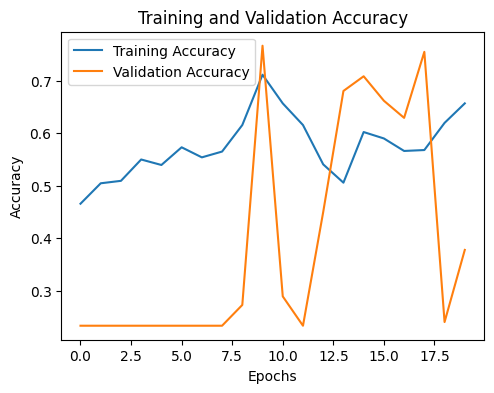

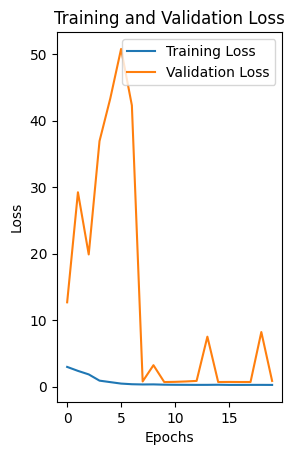

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()